## Import Modules


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


## Load and  Preparing The Dataset 


In [94]:
from sklearn.datasets import fetch_california_housing

In [95]:
data=fetch_california_housing()
dataset=pd.DataFrame(data.data,columns=data.feature_names)
dataset['Price']=data.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [96]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [97]:
# datatype info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Preparing The Dataset

In [98]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [99]:
dataset.var()[dataset.var() == 0].index

Index([], dtype='object')

In [100]:
#statistical info
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


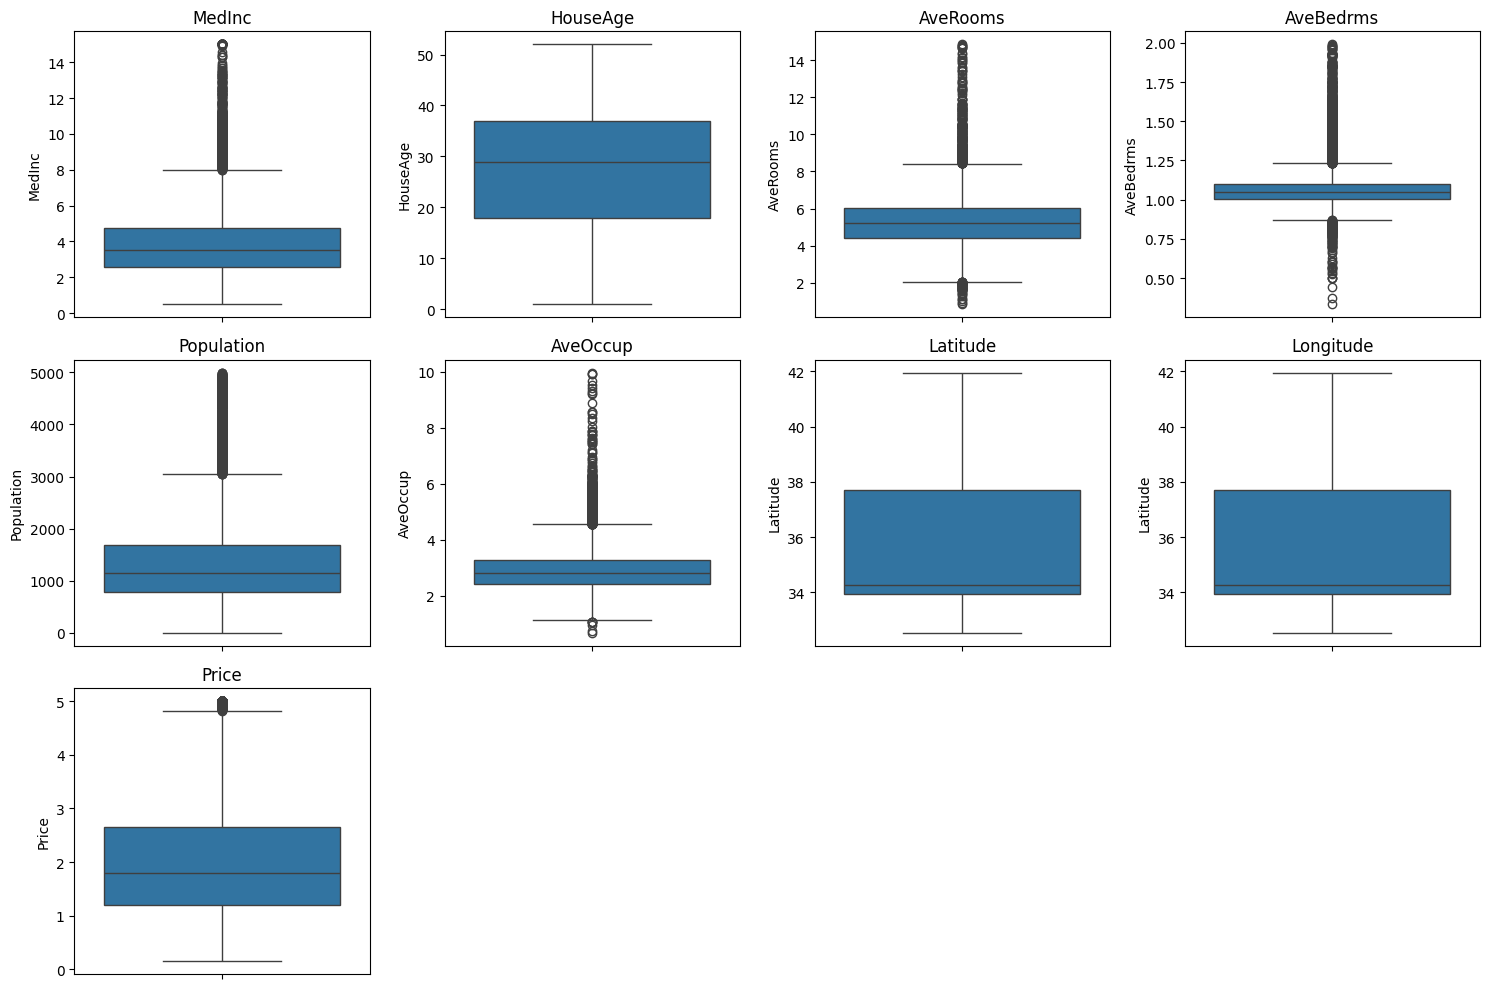

In [101]:
filtered_data = {
    'MedInc':dataset['MedInc'], 
    'HouseAge':dataset['HouseAge'], 
    'AveRooms': dataset[dataset['AveRooms'] < 15]['AveRooms'],  
    'AveBedrms': dataset[dataset['AveBedrms'] <2]['AveBedrms'],                       
    'Population': dataset[dataset['Population'] < 5000]['Population'], 
    'AveOccup': dataset[dataset['AveOccup'] < 10]['AveOccup'],
    'Latitude':dataset['Latitude'],
    'Longitude':dataset['Latitude'], 
    'Price':dataset['Price']                                                                                                                                                                                                                          # بدون فیلتر
}

plt.figure(figsize=(15, 10))

for i, (column, data) in enumerate(filtered_data.items()):
    plt.subplot(3, 4, i + 1) 
    sns.boxplot(data=data) 
    plt.title(column)

plt.tight_layout()
plt.show()


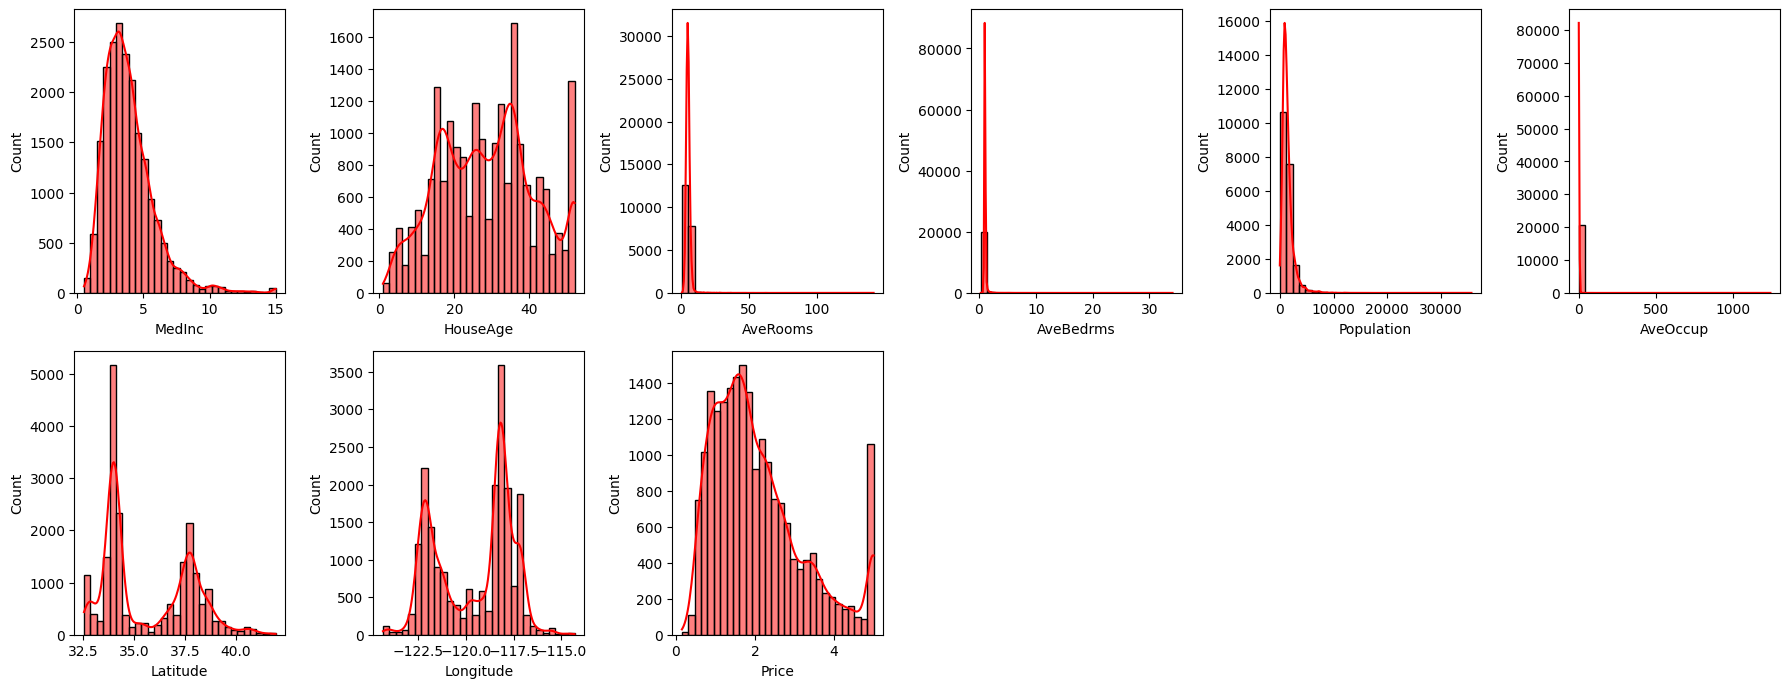

In [34]:
plt.figure(figsize=(18, 10))
for i, column in enumerate(dataset.columns, 1):
    plt.subplot(3, 6, i)  
    sns.histplot(dataset[column], kde=True, bins=30, color="red", linewidth=1)

plt.tight_layout()
plt.show()

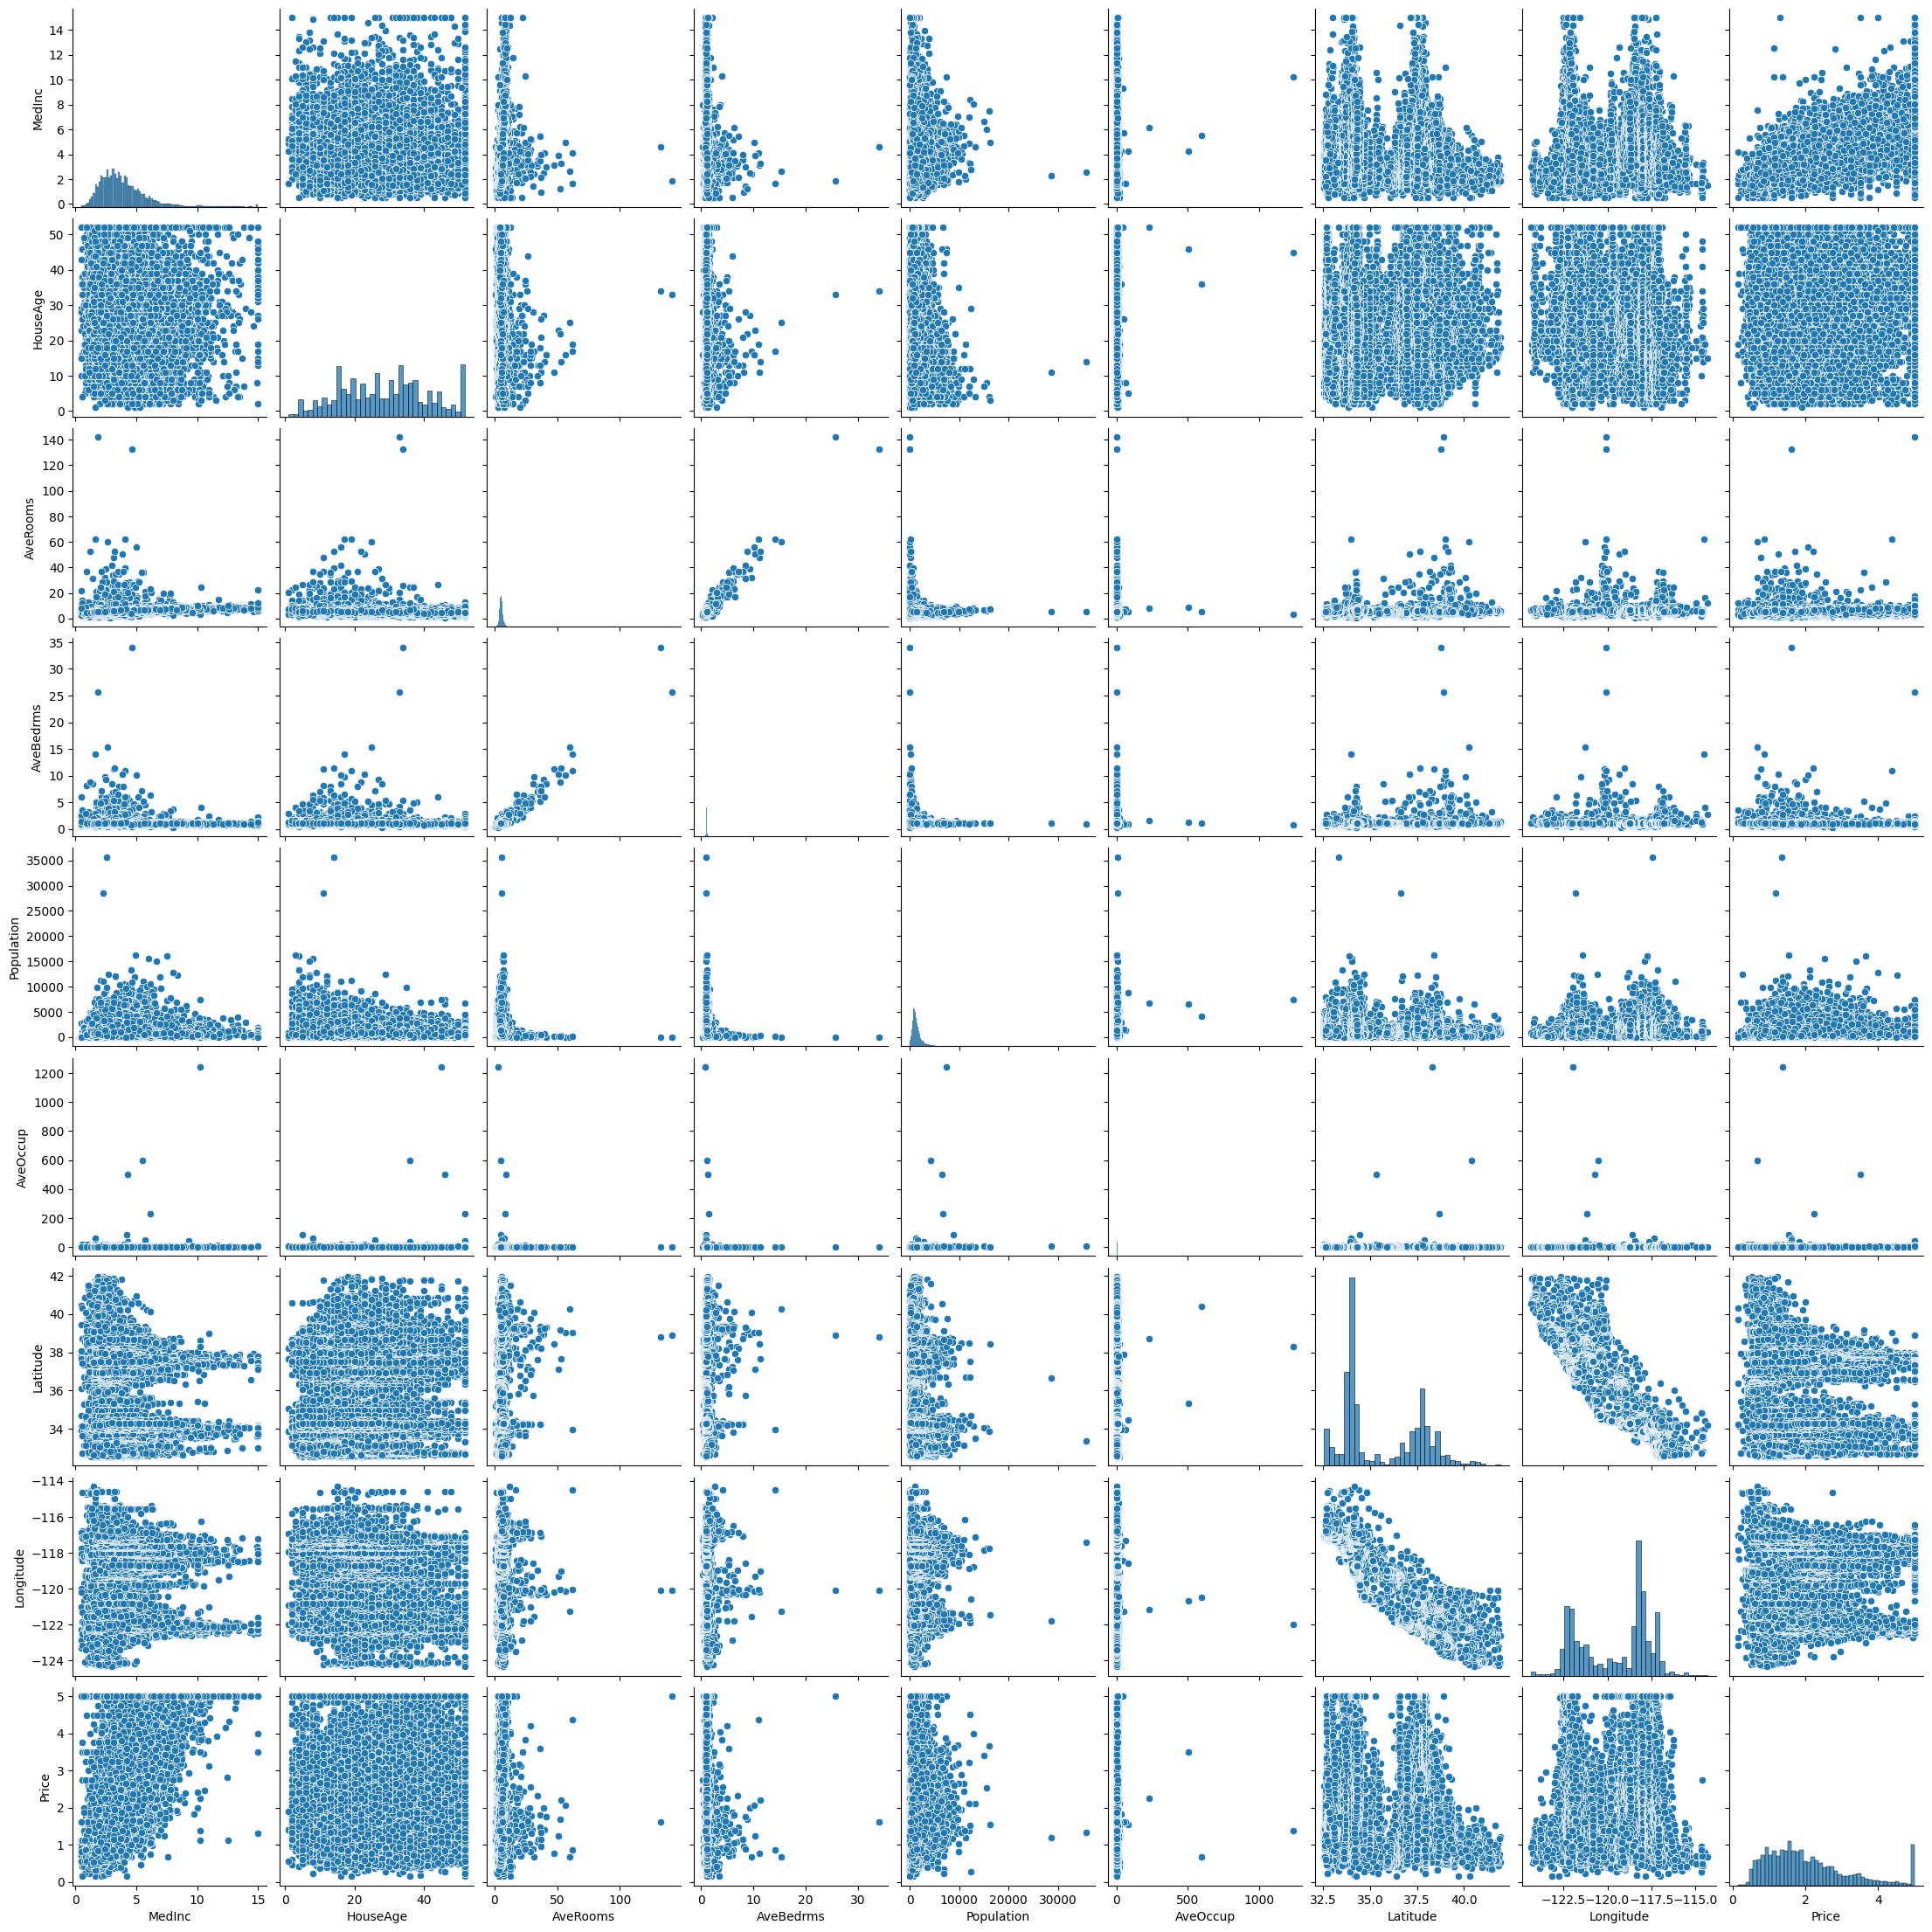

In [76]:
sns.pairplot(dataset)

The statistical summary revealed significant outliers in several features, with maximum values far exceeding the 75th percentile. For instance, the maximum number of average rooms was 141.91, while the 75th percentile was only 6.05, indicating extreme values likely representing errors or unique cases. Similarly, the average number of bedrooms and occupants per household had abnormally high values, contributing to high standard deviations and skewed distributions. These outliers distorted the dataset, potentially impacting the reliability of analyses and models built on this data.

In [102]:
q1 = dataset.quantile(0.25)
q3 = dataset.quantile(0.75)
iqr = q3-q1
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
((dataset >upper_limit) |(dataset < lower_limit)).sum().sum()
outliers=((dataset >upper_limit) |(dataset < lower_limit))

In [103]:
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
df =dataset.copy()
df[((df >upper_limit) |(df < lower_limit))]=np.nan
scaler = RobustScaler()
scaled_features = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_features, columns=df.columns)

imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(scaled_df)
imputed_df = pd.DataFrame(imputed_data, columns=scaled_df.columns)


original_scale_data = scaler.inverse_transform(imputed_data)
original_scale_df = pd.DataFrame(original_scale_data, columns=scaled_df.columns)


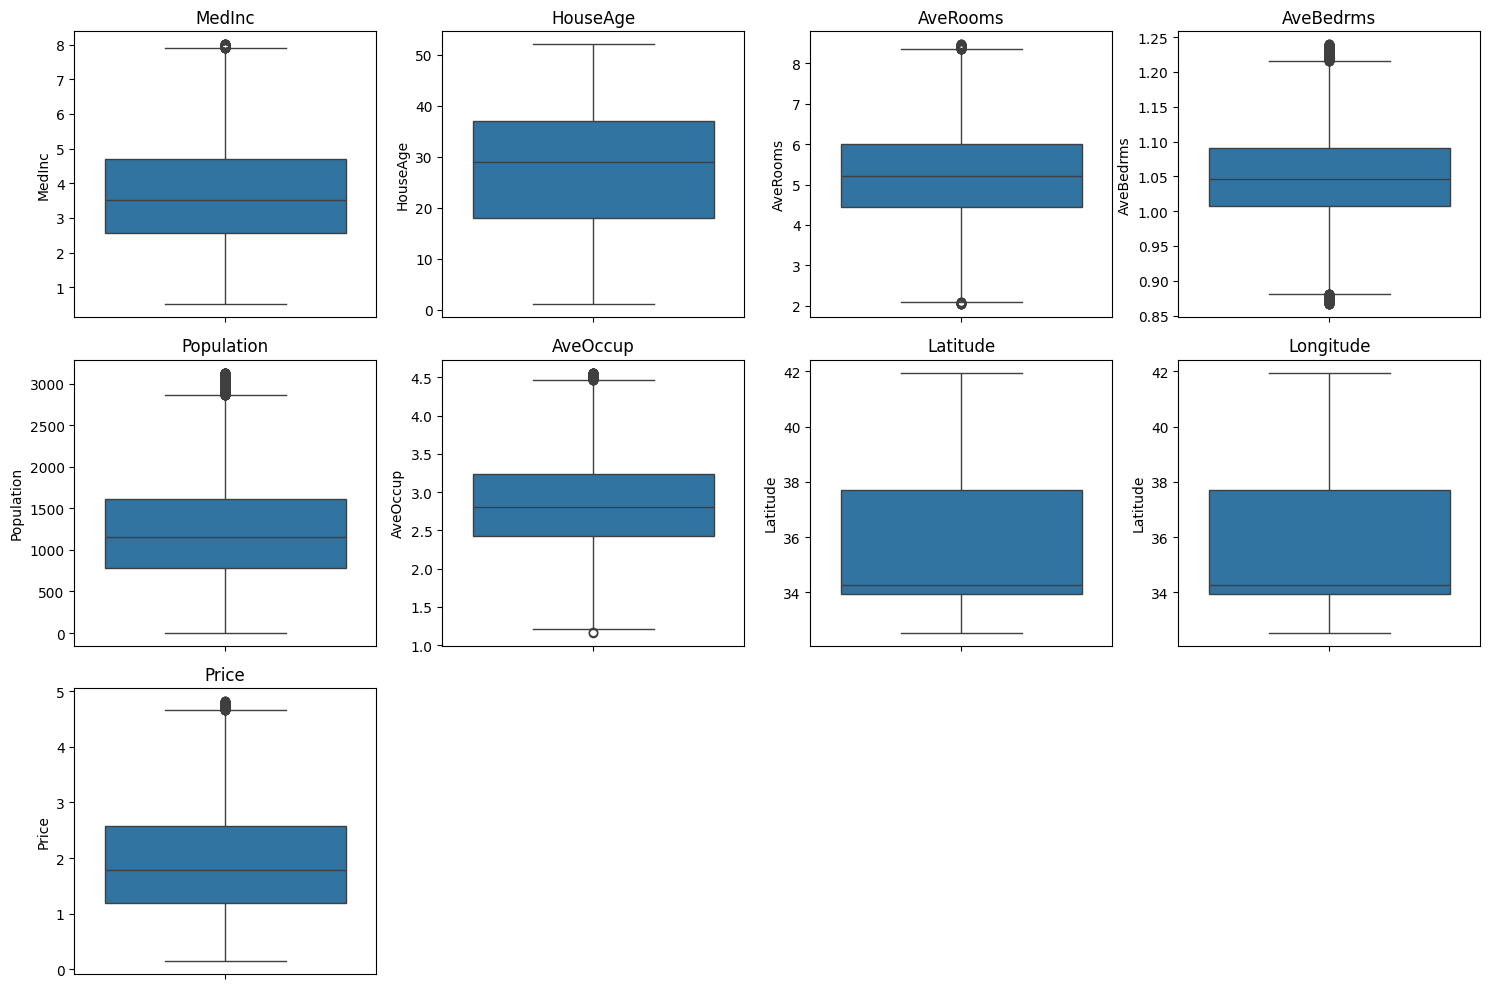

In [65]:
filtered_data = {
    'MedInc':original_scale_df['MedInc'], 
    'HouseAge':original_scale_df['HouseAge'], 
    'AveRooms': original_scale_df[original_scale_df['AveRooms'] < 15]['AveRooms'],  
    'AveBedrms': original_scale_df[original_scale_df['AveBedrms'] <2]['AveBedrms'],                       
    'Population': original_scale_df[original_scale_df['Population'] < 5000]['Population'], 
    'AveOccup': original_scale_df[original_scale_df['AveOccup'] < 10]['AveOccup'],
    'Latitude':original_scale_df['Latitude'],
    'Longitude':original_scale_df['Latitude'], 
    'Price':original_scale_df['Price']                                                                                                                                                                                                                          # بدون فیلتر
}

plt.figure(figsize=(15, 10))

for i, (column, data) in enumerate(filtered_data.items()):
    plt.subplot(3, 4, i + 1) 
    sns.boxplot(data=data) 
    plt.title(column)

plt.tight_layout()
plt.show()

In [66]:
original_scale_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.724674,28.639486,5.252264,1.049903,1241.173614,2.854378,35.631861,-119.569704,1.967448
std,1.528002,12.585558,1.154086,0.065298,632.531065,0.627204,2.135952,2.003532,0.978515
min,0.499900,1.000000,2.032738,0.866013,3.000000,1.161290,32.540000,-124.350000,0.149990
25%,2.562500,18.000000,4.439508,1.006884,784.000000,2.426789,33.930000,-121.800000,1.194750
50%,3.525000,29.000000,5.217129,1.046875,1150.000000,2.806929,34.260000,-118.490000,1.786000
75%,4.700000,37.000000,6.002202,1.090517,1616.000000,3.242177,37.710000,-118.010000,2.581000
max,8.011300,52.000000,8.469738,1.239521,3132.000000,4.560748,41.950000,-114.310000,4.822000


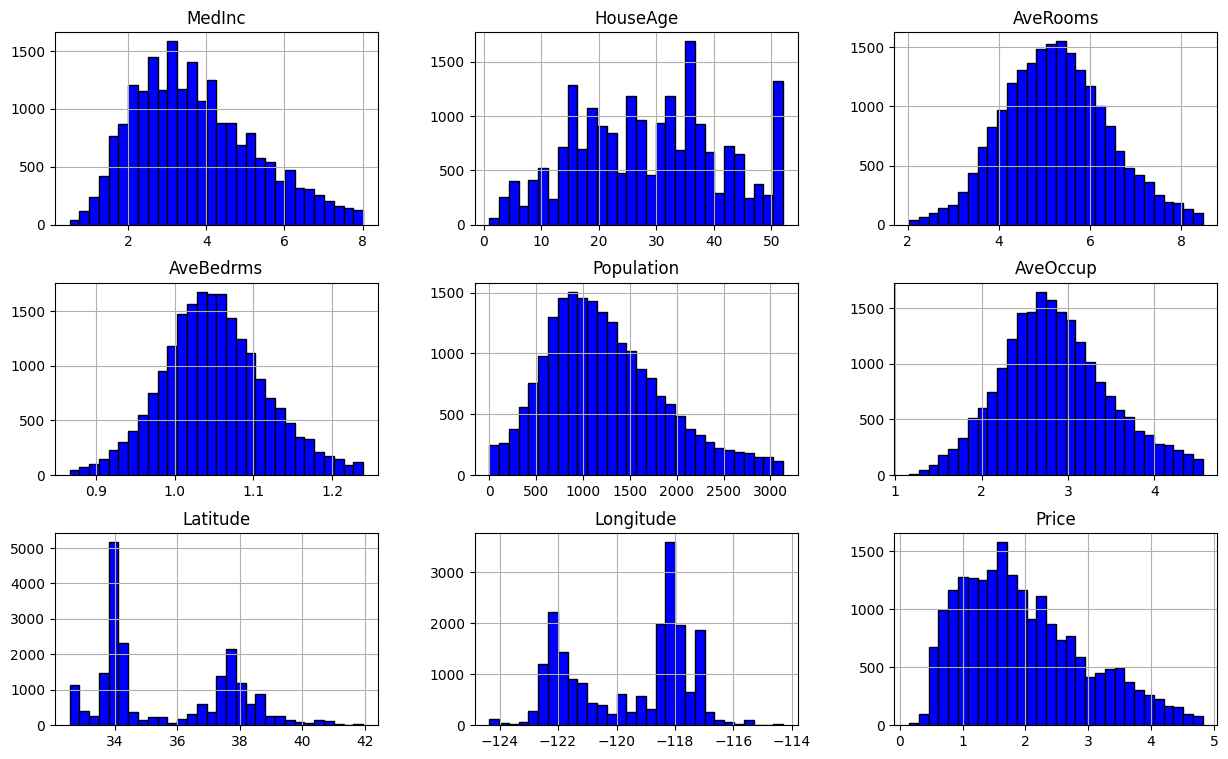

In [67]:
original_scale_df.hist(bins=30, edgecolor="black", figsize=(15,9),color='blue');plt.show()

## Analyzing The Correlated Features

In [68]:
original_scale_df.corr()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.161268,0.663776,-0.242218,0.004850,-0.043530,-0.081320,-0.017680,0.668907
HouseAge,-0.161268,1.000000,-0.221603,-0.095681,-0.238827,-0.013416,0.011173,-0.108197,0.088262
AveRooms,0.663776,-0.221603,1.000000,0.014434,-0.093737,0.020420,0.125975,-0.083543,0.296642
AveBedrms,-0.242218,-0.095681,0.014434,1.000000,0.056082,-0.105509,0.032494,0.012987,-0.113593
Population,0.004850,-0.238827,-0.093737,0.056082,1.000000,0.230190,-0.128107,0.103072,-0.003286
AveOccup,-0.043530,-0.013416,0.020420,-0.105509,0.230190,1.000000,-0.164285,0.175498,-0.266736
Latitude,-0.081320,0.011173,0.125975,0.032494,-0.128107,-0.164285,1.000000,-0.924664,-0.147354
Longitude,-0.017680,-0.108197,-0.083543,0.012987,0.103072,0.175498,-0.924664,1.000000,-0.051743
Price,0.668907,0.088262,0.296642,-0.113593,-0.003286,-0.266736,-0.147354,-0.051743,1.000000


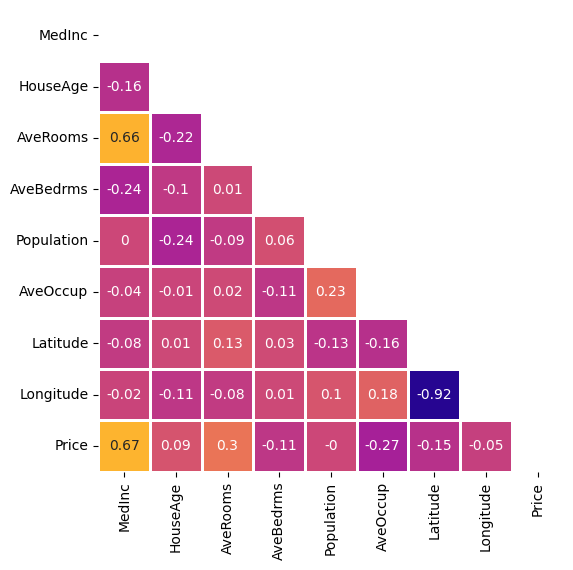

In [70]:
def corrMat(df,id=False):
    
    corr_mat = df.select_dtypes(include=[np.number]).corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='plasma',square=False,lw=2,annot=True,cbar=False);plt.show()  


corrMat(original_scale_df)

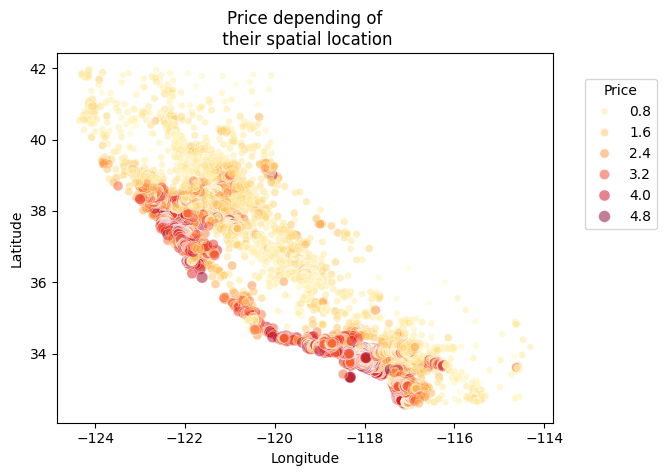

In [72]:
sns.scatterplot(
    data=original_scale_df,
    x="Longitude",
    y="Latitude",
    size="Price",
    hue="Price",
    palette="YlOrRd",
    alpha=0.5
)
plt.legend(title="Price", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Price depending of\n their spatial location")

The analysis of the California housing dataset highlights that median income is the most influential factor in determining housing prices, with higher income levels strongly correlating with higher property values. Geographic location also plays a critical role, as properties situated further west (closer to the coast)  tend to be more expensive.Additionally, homes with more rooms are positively associated with higher prices, reflecting the value of larger living spaces. In contrast, a higher proportion of bedrooms to total rooms negatively impacts prices, suggesting that inefficient room configurations may reduce desirability. Interestingly, population density and related metrics show little to no significant impact on housing prices. Overall, the findings emphasize that income levels and geographic desirability are the key drivers shaping California’s housing market.

## Coefficient Analysis of Each Feature in Housing Price Prediction

In [104]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = LassoCV(cv=10)  
lasso.fit(X_train, y_train)
coefficients = pd.DataFrame({
  "Feature":  original_scale_df.columns[:-1],
   "Coefficient": lasso.coef_.round(2)
})

print(coefficients)

      Feature  Coefficient
0      MedInc         0.41
1    HouseAge         0.01
2    AveRooms        -0.05
3   AveBedrms         0.69
4  Population         0.00
5    AveOccup        -0.38
6    Latitude        -0.38
7   Longitude        -0.37


The Lasso regression identified MedInc (median income) and AveBedrms (average bedrooms per household) as the most significant positive predictors of housing prices, with coefficients of 0.41 and 0.69, respectively. Features like Latitude and Longitude negatively impact prices (-0.38 and -0.37), while Population had no significant effect (coefficient: 0.00). Lasso effectively selected key features by shrinking less important coefficients toward zero.

In [105]:
original_scale_df = original_scale_df.drop(columns=['Population'])
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression


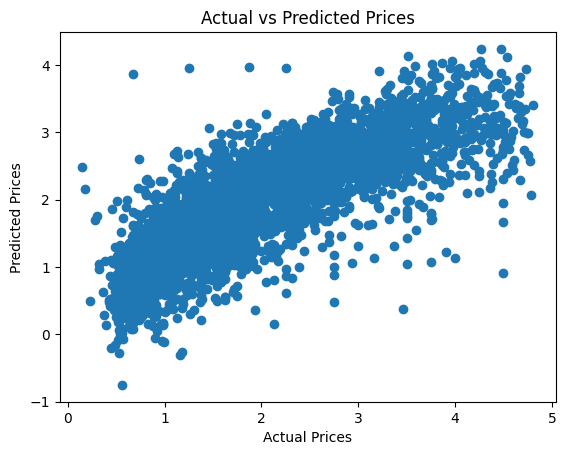

In [106]:
regression = LinearRegression()
regression.fit(X_train_scaled, y_train)  
reg_pred = regression.predict(X_test_scaled)

plt.scatter(y_test, reg_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

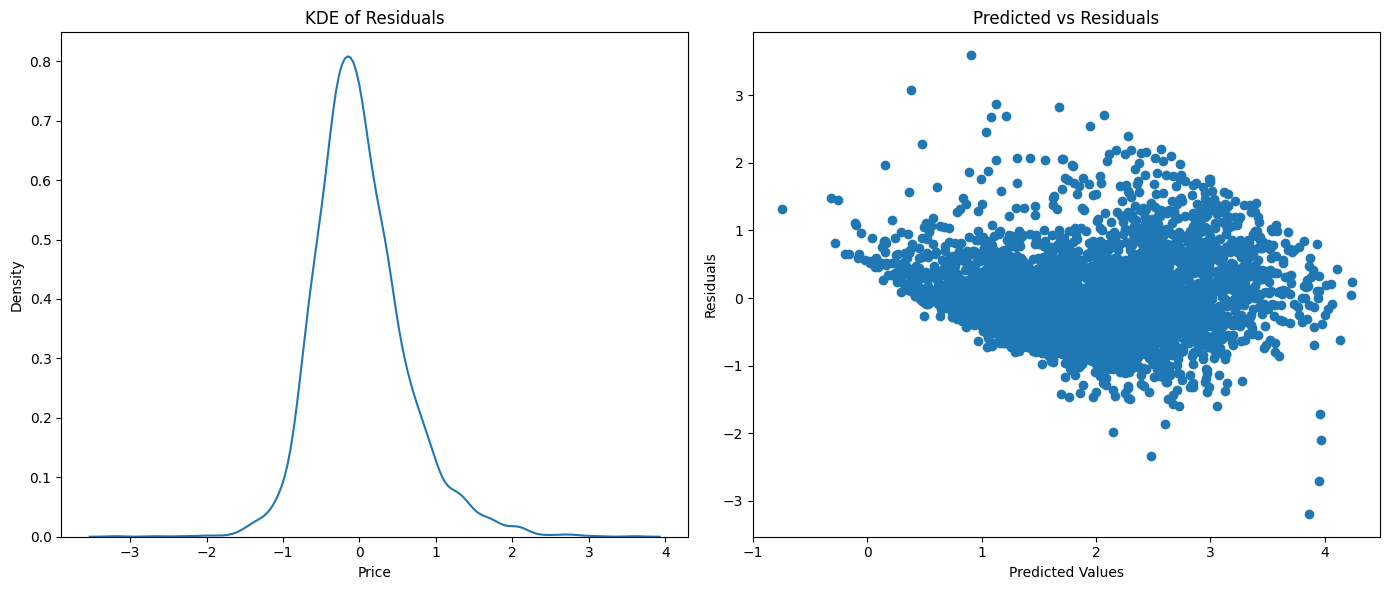

In [107]:
lr_residuals=y_test-reg_pred
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.kdeplot(lr_residuals, ax=ax[0])
ax[0].set_title('KDE of Residuals')

ax[1].scatter(reg_pred, lr_residuals)
ax[1].set_title('Predicted vs Residuals')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

In [109]:
from sklearn.metrics import r2_score
results = []
print('LR MAE:',mean_absolute_error(y_test,reg_pred))
print('LR MSE:',mean_squared_error(y_test,reg_pred))
print('LR RMSE:',np.sqrt(mean_squared_error(y_test,reg_pred)))
score=r2_score(y_test,reg_pred)
AdjustedR2=1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
print('LR R2: ',score)
print('LR Adjusted R2: ',AdjustedR2)
results.append({"Model":'LinearRegression', "MAE": mean_absolute_error(y_test,reg_pred), "MSE": mean_squared_error(y_test,reg_pred), "RMSE": np.sqrt(mean_squared_error(y_test,reg_pred)), "R2":score, "Adjusted R2": AdjustedR2})

LR MAE: 0.44383233278373146
LR MSE: 0.35007280744422864
LR RMSE: 0.5916695086314898
LR R2:  0.6340392404699574
LR Adjusted R2:  0.6333284645349634


## RandomForestRegressor

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

rf_pred = rf_model.predict(X_test_scaled)
print("Random Forest MAE:", mean_absolute_error(y_test, rf_pred))
print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
rf_score=r2_score(y_test,rf_pred)
rf_AdjustedR2=1 - (1-rf_score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
print('R2: ',rf_score)
print('Adjusted R2: ',rf_AdjustedR2)
results.append({"Model": 'RandomForest', "MAE": mean_absolute_error(y_test,rf_pred), "MSE": mean_squared_error(y_test,rf_pred), "RMSE": np.sqrt(mean_squared_error(y_test,rf_pred)), "R2":rf_score, "Adjusted R2": rf_AdjustedR2})

Random Forest MAE: 0.31479930336724804
Random Forest MSE: 0.2176128037450753
Random Forest RMSE: 0.4664898752867797
R2:  0.7725109027364336
Adjusted R2:  0.7720690690928045


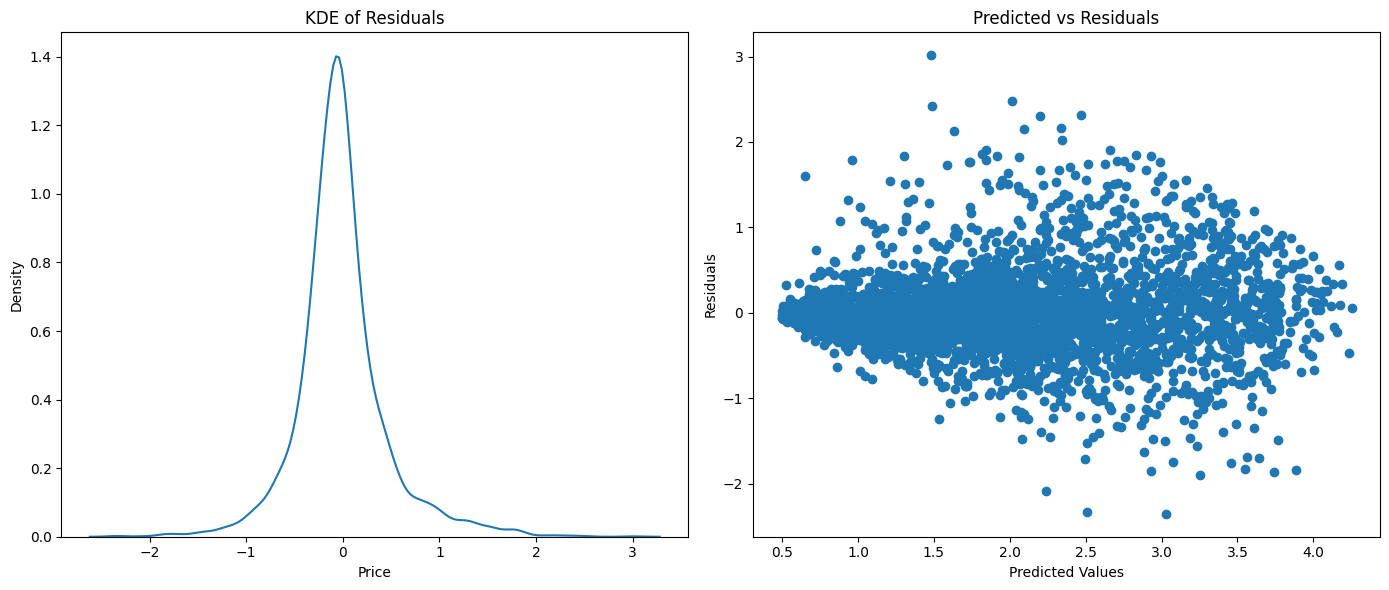

In [111]:
rf_residuals=y_test-rf_pred
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.kdeplot(rf_residuals, ax=ax[0])
ax[0].set_title('KDE of Residuals')

ax[1].scatter(rf_pred, rf_residuals)
ax[1].set_title('Predicted vs Residuals')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

## GradientBoostingRegressor

In [112]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

gb_pred = gb_model.predict(X_test_scaled)
print("Gradient Boosting MAE:", mean_absolute_error(y_test, gb_pred))
print("Gradient Boosting MSE:", mean_squared_error(y_test, gb_pred))
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, gb_pred)))
gb_score=r2_score(y_test,gb_pred)
gb_AdjustedR2=1 - (1-gb_score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
print('R2: ',gb_score)
print('Adjusted R2: ',gb_AdjustedR2)
results.append({"Model": 'XGBoost', "MAE": mean_absolute_error(y_test,gb_pred), "MSE": mean_squared_error(y_test,gb_pred), "RMSE": np.sqrt(mean_squared_error(y_test,gb_pred)), "R2":gb_score, "Adjusted R2": gb_AdjustedR2})

Gradient Boosting MAE: 0.3507277432179473
Gradient Boosting MSE: 0.2451948614659095
Gradient Boosting RMSE: 0.4951715475124853
R2:  0.7436770413845317
Adjusted R2:  0.7431792060679685


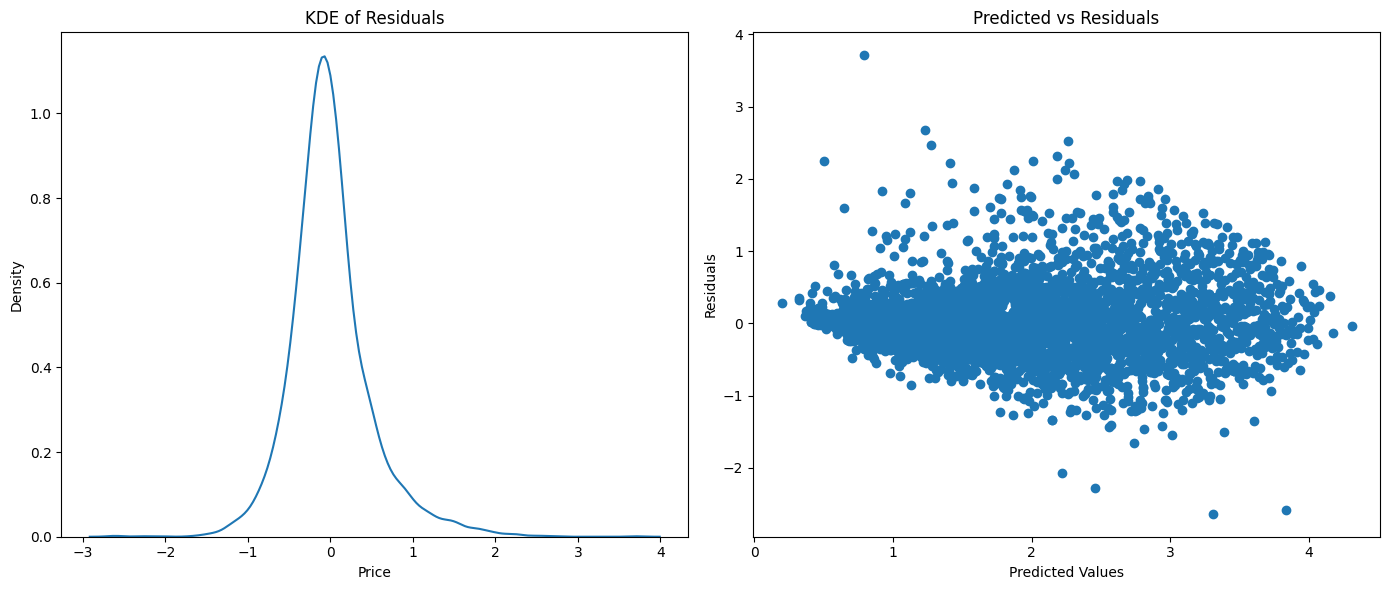

In [113]:
gb_residuals=y_test-gb_pred
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.kdeplot(gb_residuals, ax=ax[0])
ax[0].set_title('KDE of Residuals')

ax[1].scatter(gb_pred, gb_residuals)
ax[1].set_title('Predicted vs Residuals')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

## SVR

In [114]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

svr_pred = svr_model.predict(X_test_scaled)
print("SVR MAE:", mean_absolute_error(y_test, svr_pred))
print("SVR MSE:", mean_squared_error(y_test, svr_pred))
print("SVR RMSE:", np.sqrt(mean_squared_error(y_test, svr_pred)))
SVR_score=r2_score(y_test,svr_pred)
SVR_AdjustedR2=1 - (1-SVR_score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
print('SVR R2: ',SVR_score)
print('SVR Adjusted R2: ',SVR_AdjustedR2)
results.append({"Model": 'SVR', "MAE": mean_absolute_error(y_test,svr_pred), "MSE": mean_squared_error(y_test,svr_pred), "RMSE": np.sqrt(mean_squared_error(y_test,svr_pred)), "R2":SVR_score, "Adjusted R2": SVR_AdjustedR2})

SVR MAE: 0.3534398641081639
SVR MSE: 0.2567581500741806
SVR RMSE: 0.5067130845697402
SVR R2:  0.7315889563011961
SVR Adjusted R2:  0.7310676432762895


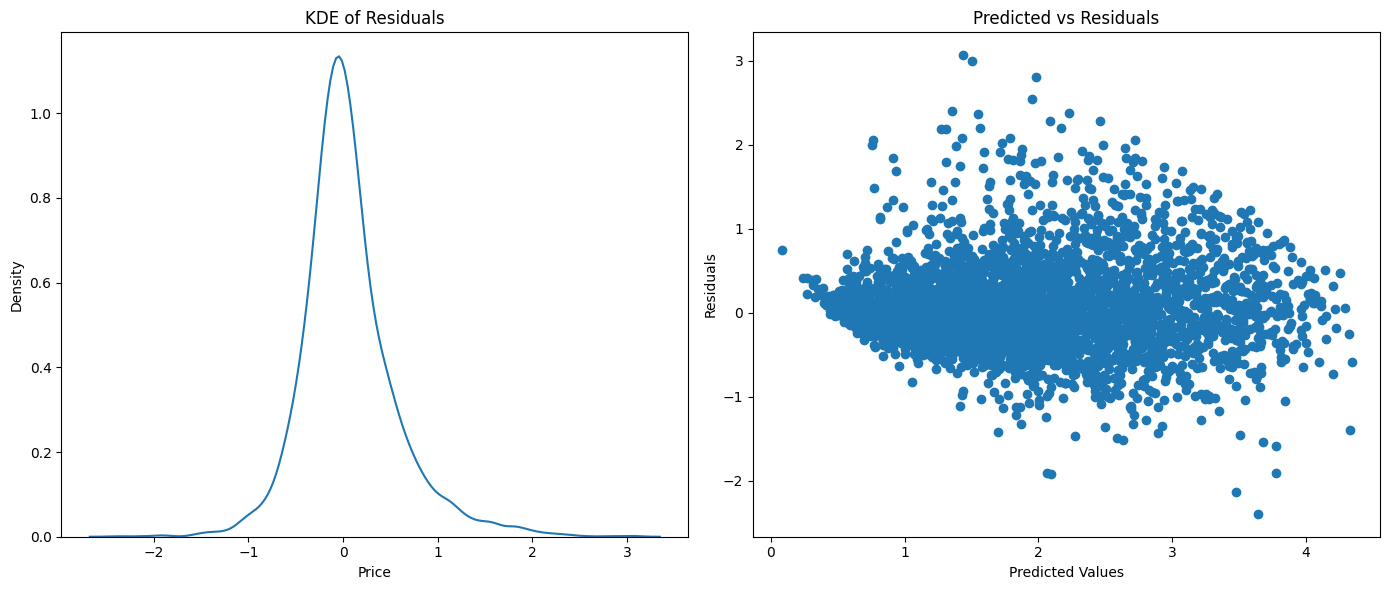

In [115]:
SVR_residuals=y_test-svr_pred
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.kdeplot(SVR_residuals, ax=ax[0])
ax[0].set_title('KDE of Residuals')

ax[1].scatter(svr_pred, SVR_residuals)
ax[1].set_title('Predicted vs Residuals')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

In [116]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

NN_pred = mlp_model.predict(X_test_scaled)

print("SVR MAE:", mean_absolute_error(y_test, NN_pred))
print("SVR MSE:", mean_squared_error(y_test, NN_pred))
print("SVR RMSE:", np.sqrt(mean_squared_error(y_test, NN_pred)))
NN_score=r2_score(y_test,NN_pred)
NN_AdjustedR2=1 - (1-NN_score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
print('SVR R2: ',NN_score)
print('SVR Adjusted R2: ',NN_AdjustedR2)
results.append({"Model": 'MLPRegressor', "MAE": mean_absolute_error(y_test,NN_pred), "MSE": mean_squared_error(y_test,NN_pred), "RMSE": np.sqrt(mean_squared_error(y_test,NN_pred)), "R2":NN_score, "Adjusted R2": NN_AdjustedR2})

SVR MAE: 0.34838989051433866
SVR MSE: 0.23827706804780197
SVR RMSE: 0.4881363211724794
SVR R2:  0.7509087968357628
SVR Adjusted R2:  0.7504250071719333


In [118]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(

    by=["R2", "Adjusted R2", "MAE", "MSE", "RMSE"], ascending=[False, False, True, True, True]
)
print(results_df)

              Model       MAE       MSE      RMSE        R2  Adjusted R2
1      RandomForest  0.314799  0.217613  0.466490  0.772511     0.772069
4      MLPRegressor  0.348390  0.238277  0.488136  0.750909     0.750425
2           XGBoost  0.350728  0.245195  0.495172  0.743677     0.743179
3               SVR  0.353440  0.256758  0.506713  0.731589     0.731068
0  LinearRegression  0.443832  0.350073  0.591670  0.634039     0.633328


The RandomForest model performed the best, with the lowest MAE (0.3148), MSE (0.2176), and RMSE (0.4665), and the highest R² (0.7725) and Adjusted R² (0.7721). In comparison, Linear Regression showed the lowest performance, with higher MAE (0.4438), MSE (0.3501), and RMSE (0.5917), along with the lowest R² (0.6340). Overall, RandomForest outperforms other models in terms of accuracy and error metrics.